In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

In [2]:
uk_owid = pd.read_csv("../data/uk_combined.csv")
world_owid = pd.read_csv("../data/owid-covid-data.csv")

In [3]:
pd.set_option('display.max_columns', None, 'display.max_rows', 10)

In [4]:
uk_owid.head(10)

date  total_cases  new_cases  new_cases_smoothed  total_deaths  \
0  2020-01-31          2.0        2.0                 NaN           NaN   
1  2020-02-01          2.0        0.0                 NaN           NaN   
2  2020-02-02          2.0        0.0                 NaN           NaN   
3  2020-02-03          8.0        6.0                 NaN           NaN   
4  2020-02-04          8.0        0.0                 NaN           NaN   
5  2020-02-05          9.0        1.0               1.286           NaN   
6  2020-02-06          9.0        0.0               1.286           NaN   
7  2020-02-07          9.0        0.0               1.000           NaN   
8  2020-02-08         13.0        4.0               1.571           NaN   
9  2020-02-09         14.0        1.0               1.714           NaN   

   new_deaths  new_deaths_smoothed  total_cases_per_million  \
0         NaN                  NaN                    0.029   
1         NaN                  NaN                    0.029   
2         NaN                  NaN                    0.029   
3         NaN                  NaN                    0.118   
4         NaN                  NaN                    0.118   
5         NaN                  0.0                    0.133   
6         NaN                  0.0                    0.133   
7         NaN                  0.0                    0.133   
8         NaN                  0.0                    0.191   
9         NaN                  0.0                    0.206   

   new_cases_per_million  new_cases_smoothed_per_million  \
0                  0.029                             NaN   
1                  0.000                             NaN   
2                  0.000                             NaN   
3                  0.088                             NaN   
4                  0.000                             NaN   
5                  0.015                           0.019   
6                  0.000                           0.019   
7                  0.000                           0.015   
8                  0.059                           0.023   
9                  0.015                           0.025   

   total_deaths_per_million  new_deaths_per_million  \
0                       NaN                     NaN   
1                       NaN                     NaN   
2                       NaN                     NaN   
3                       NaN                     NaN   
4                       NaN                     NaN   
5                       NaN                     NaN   
6                       NaN                     NaN   
7                       NaN                     NaN   
8                       NaN                     NaN   
9                       NaN                     NaN   

   new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
0                              NaN                NaN           NaN   
1                              NaN                NaN           NaN   
2                              NaN                NaN           NaN   
3                              NaN                NaN           NaN   
4                              NaN                NaN           NaN   
5                              0.0                NaN           NaN   
6                              0.0                NaN           NaN   
7                              0.0                NaN           NaN   
8                              0.0                NaN           NaN   
9                              0.0                NaN           NaN   

   icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
0                       NaN            NaN                        NaN   
1                       NaN            NaN                        NaN   
2                       NaN            NaN                        NaN   
3                       NaN            NaN                        NaN   
4                       NaN            NaN                        NaN   
5 

In [5]:
# convert 'date' to datetime type
uk_owid['date'] = pd.to_datetime(uk_owid['date'], format='%Y-%m-%d')

In [6]:
uk_owid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 99 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   472 non-null    datetime64[ns]
 1   total_cases                            441 non-null    float64       
 2   new_cases                              441 non-null    float64       
 3   new_cases_smoothed                     436 non-null    float64       
 4   total_deaths                           406 non-null    float64       
 5   new_deaths                             406 non-null    float64       
 6   new_deaths_smoothed                    436 non-null    float64       
 7   total_cases_per_million                441 non-null    float64       
 8   new_cases_per_million                  441 non-null    float64       
 9   new_cases_smoothed_per_million         436 non-null    float64   

In [7]:
uk_owid.drop('tests_units', axis=1, inplace=True)

In [8]:
# sort dataframe according to date
uk_owid.sort_values(by=['date'], ascending=True, inplace=True)

In [9]:
# Find indices of null values for new_cases and new_deaths
new_cases_null_inds = uk_owid[uk_owid['new_cases'].isnull()].date.values
new_cases_null_inds

array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000',
       '2020-01-05T00:00:00.000000000', '2020-01-06T00:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
       '2020-01-09T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000', '2020-01-12T00:00:00.000000000',
       '2020-01-13T00:00:00.000000000', '2020-01-14T00:00:00.000000000',
       '2020-01-15T00:00:00.000000000', '2020-01-16T00:00:00.000000000',
       '2020-01-17T00:00:00.000000000', '2020-01-18T00:00:00.000000000',
       '2020-01-19T00:00:00.000000000', '2020-01-20T00:00:00.000000000',
       '2020-01-21T00:00:00.000000000', '2020-01-22T00:00:00.000000000',
       '2020-01-23T00:00:00.000000000', '2020-01-24T00:00:00.000000000',
       '2020-01-25T00:00:00.000000000', '2020-01-26T00:00:00.000000000',
       '2020-01-27T00:00:00.000000000', '2020-01-28

In [10]:
new_deaths_null_inds = uk_owid[uk_owid['new_deaths'].isnull()].date.values
new_deaths_null_inds

array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000',
       '2020-01-05T00:00:00.000000000', '2020-01-06T00:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
       '2020-01-09T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000', '2020-01-12T00:00:00.000000000',
       '2020-01-13T00:00:00.000000000', '2020-01-14T00:00:00.000000000',
       '2020-01-15T00:00:00.000000000', '2020-01-16T00:00:00.000000000',
       '2020-01-17T00:00:00.000000000', '2020-01-18T00:00:00.000000000',
       '2020-01-19T00:00:00.000000000', '2020-01-20T00:00:00.000000000',
       '2020-01-21T00:00:00.000000000', '2020-01-22T00:00:00.000000000',
       '2020-01-23T00:00:00.000000000', '2020-01-24T00:00:00.000000000',
       '2020-01-25T00:00:00.000000000', '2020-01-26T00:00:00.000000000',
       '2020-01-27T00:00:00.000000000', '2020-01-28

In [11]:
stringency_null_inds = uk_owid[uk_owid['StringencyIndex'].isnull()].date.values
stringency_null_inds

array(['2021-04-16T00:00:00.000000000'], dtype='datetime64[ns]')

In [12]:
# Filling null values for new_cases and new_deaths as 0
values = {'new_cases':0, 'new_deaths':0}
uk_owid.fillna(value=values).head(10)

date  total_cases  new_cases  new_cases_smoothed  total_deaths  \
441 2020-01-01          NaN        0.0                 NaN           NaN   
442 2020-01-02          NaN        0.0                 NaN           NaN   
443 2020-01-03          NaN        0.0                 NaN           NaN   
444 2020-01-04          NaN        0.0                 NaN           NaN   
445 2020-01-05          NaN        0.0                 NaN           NaN   
446 2020-01-06          NaN        0.0                 NaN           NaN   
447 2020-01-07          NaN        0.0                 NaN           NaN   
448 2020-01-08          NaN        0.0                 NaN           NaN   
449 2020-01-09          NaN        0.0                 NaN           NaN   
450 2020-01-10          NaN        0.0                 NaN           NaN   

     new_deaths  new_deaths_smoothed  total_cases_per_million  \
441         0.0                  NaN                      NaN   
442         0.0                  NaN                      NaN   
443         0.0                  NaN                      NaN   
444         0.0                  NaN                      NaN   
445         0.0                  NaN                      NaN   
446         0.0                  NaN                      NaN   
447         0.0                  NaN                      NaN   
448         0.0                  NaN                      NaN   
449         0.0                  NaN                      NaN   
450         0.0                  NaN                      NaN   

     new_cases_per_million  new_cases_smoothed_per_million  \
441                    NaN                             NaN   
442                    NaN                             NaN   
443                    NaN                             NaN   
444                    NaN                             NaN   
445                    NaN                             NaN   
446                    NaN                             NaN   
447                    NaN                             NaN   
448                    NaN                             NaN   
449                    NaN                             NaN   
450                    NaN                             NaN   

     total_deaths_per_million  new_deaths_per_million  \
441                       NaN                     NaN   
442                       NaN                     NaN   
443                       NaN                     NaN   
444                       NaN                     NaN   
445                       NaN                     NaN   
446                       NaN                     NaN   
447                       NaN                     NaN   
448                       NaN                     NaN   
449                       NaN                     NaN   
450                       NaN                     NaN   

     new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
441                              NaN                NaN           NaN   
442                              NaN                NaN           NaN   
443                              NaN                NaN           NaN   
444                              NaN                NaN           NaN   
445                              NaN                NaN           NaN   
446                              NaN                NaN           NaN   
447                              NaN                NaN           NaN   
448                              NaN                NaN           NaN   
449                              NaN                NaN           NaN   
450                              NaN                NaN           NaN   

     icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
441                       NaN            NaN                        NaN   
442                       NaN            NaN                        NaN   
443                       NaN            NaN                        NaN   
444                       NaN            N

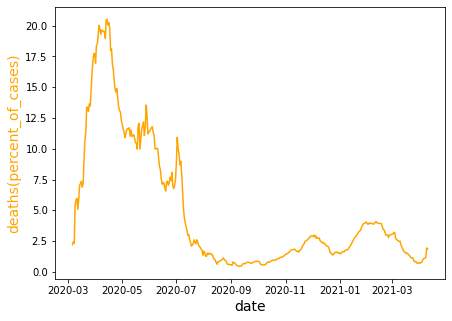

In [13]:
cases_str = 'new_cases_smoothed'
deaths_str = 'new_deaths_smoothed'

cases_deaths_df = uk_owid.loc[:,['date', cases_str, deaths_str]]
cases_deaths_df = cases_deaths_df[(cases_deaths_df['date'] > '2020-03-05') & (cases_deaths_df['date'] < '2021-04-16')]
cases_deaths_df['percent_of_cases'] = (cases_deaths_df[deaths_str].shift(-5)*100)/cases_deaths_df[cases_str]
fig,ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.plot(cases_deaths_df['date'], cases_deaths_df['percent_of_cases'], color="orange")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel('deaths(percent_of_cases)',color="orange",fontsize=14)
plt.show()
# g.fig.autofmt_xdate()


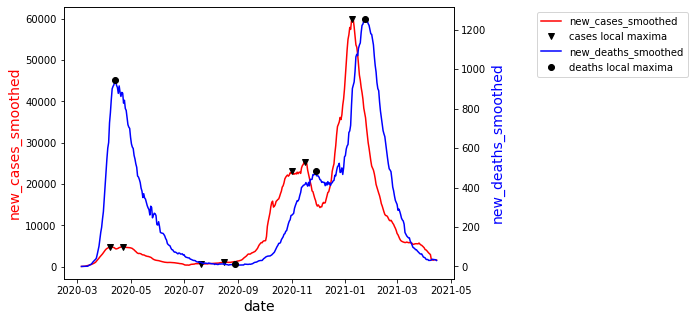

In [14]:
# finding peaks in new_deaths and new_cases
cases_ilocs_max = argrelextrema(cases_deaths_df[cases_str].values, np.greater_equal, order=10)[0]
deaths_ilocs_max = argrelextrema(cases_deaths_df[deaths_str].values, np.greater_equal, order=10)[0]


fig,ax = plt.subplots()
fig.set_size_inches(7, 5)
l1 = ax.plot(cases_deaths_df['date'], cases_deaths_df[cases_str], color="red",label=cases_str)
l2 = ax.plot(cases_deaths_df['date'].iloc[cases_ilocs_max], cases_deaths_df[cases_str].iloc[cases_ilocs_max], lw=0, color='black', marker="v", label='cases local maxima')
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel(cases_str,color="red",fontsize=14)
ax.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
l3 = ax2.plot(cases_deaths_df['date'], cases_deaths_df[deaths_str], color="blue", label=deaths_str)
l4 = ax2.plot(cases_deaths_df['date'].iloc[deaths_ilocs_max], cases_deaths_df[deaths_str].iloc[deaths_ilocs_max], lw=0, color='black', marker="o", label='deaths local maxima')
ax2.set_ylabel(deaths_str,color="blue",fontsize=14)
# ax2.legend(loc=1)

lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(1.2,1), loc="upper left")
plt.show()
# # save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

In [15]:
print(f"cases max dates:\n{cases_deaths_df['date'].iloc[cases_ilocs_max]}\n")
print(f"deaths max dates:\n{cases_deaths_df['date'].iloc[deaths_ilocs_max]}\n")

cases max dates:
68    2020-04-08
82    2020-04-22
171   2020-07-20
197   2020-08-15
275   2020-11-01
290   2020-11-16
344   2021-01-09
Name: date, dtype: datetime64[ns]

deaths max dates:
73    2020-04-13
210   2020-08-28
302   2020-11-28
358   2021-01-23
Name: date, dtype: datetime64[ns]



In [16]:
degrees = 45

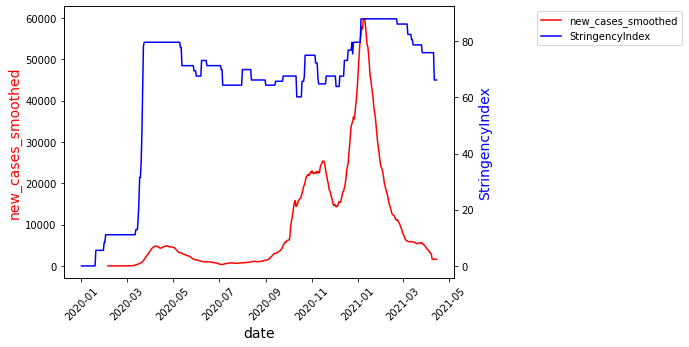

In [17]:
# cases overlaid with stringency index
index_considered = 'StringencyIndex'
fig,ax = plt.subplots()
fig.set_size_inches(7, 5)
plt.xticks(rotation=degrees)
l1 = ax.plot(uk_owid['date'], uk_owid[cases_str], color="red",label=cases_str)
# l2 = ax.plot(['date'].iloc[cases_ilocs_max], cases_deaths_df[cases_str].iloc[cases_ilocs_max], lw=0, color='black', marker="v", label='cases local maxima')
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel(cases_str,color="red",fontsize=14)
ax.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
l3 = ax2.plot(uk_owid['date'], uk_owid[index_considered], color="blue", label=index_considered)
# l4 = ax2.plot(cases_deaths_df['date'].iloc[deaths_ilocs_max], cases_deaths_df[deaths_str].iloc[deaths_ilocs_max], lw=0, color='black', marker="o", label='deaths local maxima')
ax2.set_ylabel(index_considered,color="blue",fontsize=14)
# ax2.legend(loc=1)

lns = l1+l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(1.2,1), loc="upper left")

plt.show()

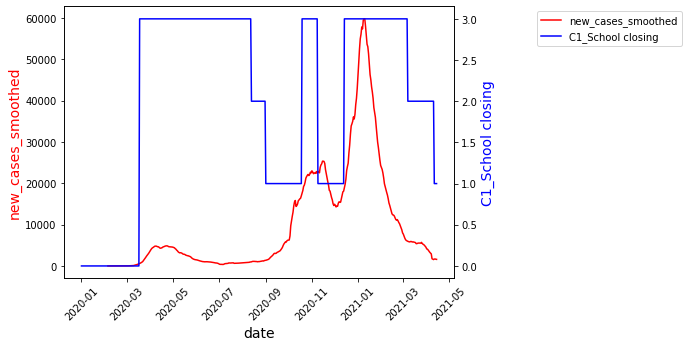

In [18]:
# cases overlaid with C1_School closing

index_considered = 'C1_School closing'
fig,ax = plt.subplots()
fig.set_size_inches(7, 5)
plt.xticks(rotation=degrees)
l1 = ax.plot(uk_owid['date'], uk_owid[cases_str], color="red",label=cases_str)
# l2 = ax.plot(['date'].iloc[cases_ilocs_max], cases_deaths_df[cases_str].iloc[cases_ilocs_max], lw=0, color='black', marker="v", label='cases local maxima')
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel(cases_str,color="red",fontsize=14)
ax.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
l3 = ax2.plot(uk_owid['date'], uk_owid[index_considered], color="blue", label=index_considered)
# l4 = ax2.plot(cases_deaths_df['date'].iloc[deaths_ilocs_max], cases_deaths_df[deaths_str].iloc[deaths_ilocs_max], lw=0, color='black', marker="o", label='deaths local maxima')
ax2.set_ylabel(index_considered,color="blue",fontsize=14)
# ax2.legend(loc=1)

lns = l1+l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(1.2,1), loc="upper left")

plt.show()

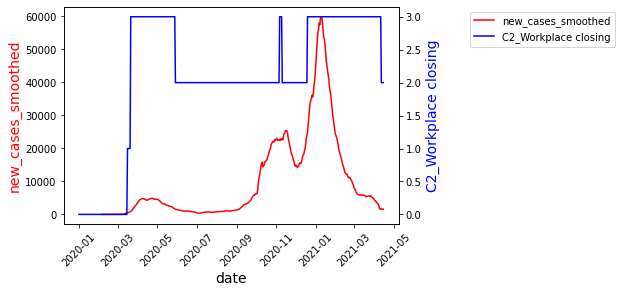

In [19]:
# cases overlaid with C2_Workplace closing

index_considered = 'C2_Workplace closing'
fig,ax = plt.subplots()
plt.xticks(rotation=degrees)
l1 = ax.plot(uk_owid['date'], uk_owid[cases_str], color="red",label=cases_str)
# l2 = ax.plot(['date'].iloc[cases_ilocs_max], cases_deaths_df[cases_str].iloc[cases_ilocs_max], lw=0, color='black', marker="v", label='cases local maxima')
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel(cases_str,color="red",fontsize=14)
ax.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
l3 = ax2.plot(uk_owid['date'], uk_owid[index_considered], color="blue", label=index_considered)
# l4 = ax2.plot(cases_deaths_df['date'].iloc[deaths_ilocs_max], cases_deaths_df[deaths_str].iloc[deaths_ilocs_max], lw=0, color='black', marker="o", label='deaths local maxima')
ax2.set_ylabel(index_considered,color="blue",fontsize=14)
# ax2.legend(loc=1)

lns = l1+l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(1.2,1), loc="upper left")

plt.show()

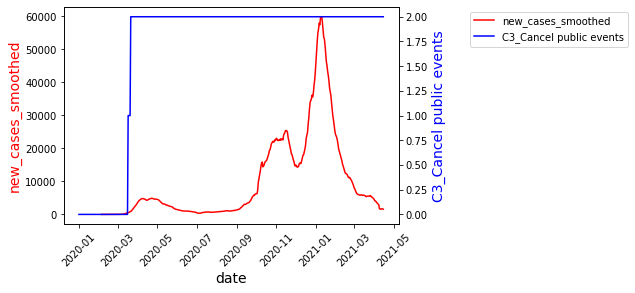

In [20]:
# cases overlaid with C3_Cancel public events

index_considered = 'C3_Cancel public events'
fig,ax = plt.subplots()
plt.xticks(rotation=degrees)
l1 = ax.plot(uk_owid['date'], uk_owid[cases_str], color="red",label=cases_str)
# l2 = ax.plot(['date'].iloc[cases_ilocs_max], cases_deaths_df[cases_str].iloc[cases_ilocs_max], lw=0, color='black', marker="v", label='cases local maxima')
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel(cases_str,color="red",fontsize=14)
ax.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
l3 = ax2.plot(uk_owid['date'], uk_owid[index_considered], color="blue", label=index_considered)
# l4 = ax2.plot(cases_deaths_df['date'].iloc[deaths_ilocs_max], cases_deaths_df[deaths_str].iloc[deaths_ilocs_max], lw=0, color='black', marker="o", label='deaths local maxima')
ax2.set_ylabel(index_considered,color="blue",fontsize=14)
# ax2.legend(loc=1)

lns = l1+l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(1.2,1), loc="upper left")

plt.show()

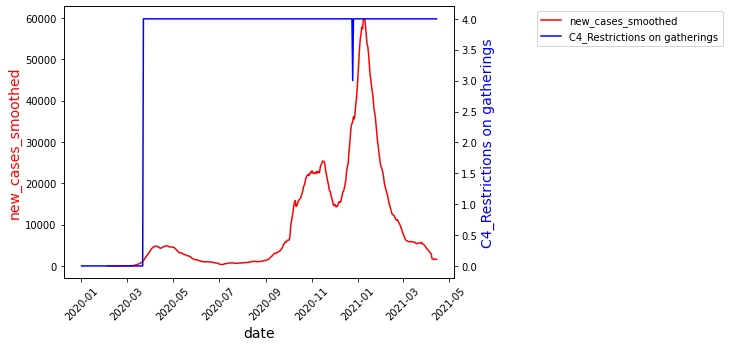

In [21]:
# cases overlaid with C4_Restrictions on gatherings

index_considered = 'C4_Restrictions on gatherings'
fig,ax = plt.subplots()
fig.set_size_inches(7, 5)
plt.xticks(rotation=degrees)
l1 = ax.plot(uk_owid['date'], uk_owid[cases_str], color="red",label=cases_str)
# l2 = ax.plot(['date'].iloc[cases_ilocs_max], cases_deaths_df[cases_str].iloc[cases_ilocs_max], lw=0, color='black', marker="v", label='cases local maxima')
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel(cases_str,color="red",fontsize=14)
ax.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
l3 = ax2.plot(uk_owid['date'], uk_owid[index_considered], color="blue", label=index_considered)
# l4 = ax2.plot(cases_deaths_df['date'].iloc[deaths_ilocs_max], cases_deaths_df[deaths_str].iloc[deaths_ilocs_max], lw=0, color='black', marker="o", label='deaths local maxima')
ax2.set_ylabel(index_considered,color="blue",fontsize=14)
# ax2.legend(loc=1)

lns = l1+l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(1.2,1), loc="upper left")

plt.show()

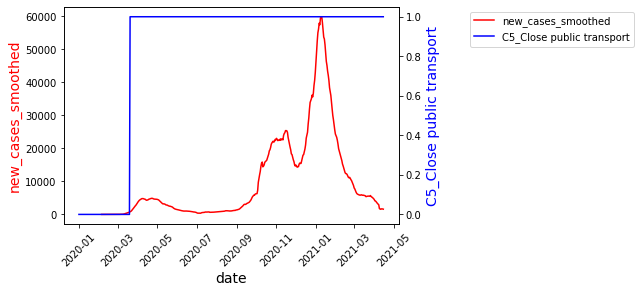

In [22]:
# cases overlaid with C5_Close public transport

index_considered = 'C5_Close public transport'
fig,ax = plt.subplots()
plt.xticks(rotation=degrees)
l1 = ax.plot(uk_owid['date'], uk_owid[cases_str], color="red",label=cases_str)
# l2 = ax.plot(['date'].iloc[cases_ilocs_max], cases_deaths_df[cases_str].iloc[cases_ilocs_max], lw=0, color='black', marker="v", label='cases local maxima')
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel(cases_str,color="red",fontsize=14)
ax.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
l3 = ax2.plot(uk_owid['date'], uk_owid[index_considered], color="blue", label=index_considered)
# l4 = ax2.plot(cases_deaths_df['date'].iloc[deaths_ilocs_max], cases_deaths_df[deaths_str].iloc[deaths_ilocs_max], lw=0, color='black', marker="o", label='deaths local maxima')
ax2.set_ylabel(index_considered,color="blue",fontsize=14)
# ax2.legend(loc=1)

lns = l1+l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(1.2,1), loc="upper left")

plt.show()

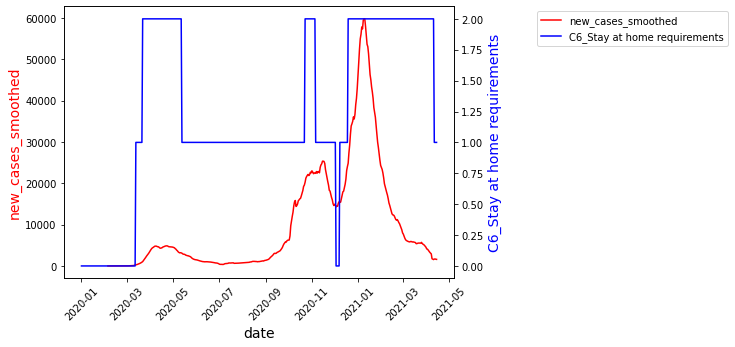

In [23]:
# cases overlaid with C6_Stay at home requirements

index_considered = 'C6_Stay at home requirements'
fig,ax = plt.subplots()
fig.set_size_inches(7, 5)
plt.xticks(rotation=degrees)
l1 = ax.plot(uk_owid['date'], uk_owid[cases_str], color="red",label=cases_str)
# l2 = ax.plot(['date'].iloc[cases_ilocs_max], cases_deaths_df[cases_str].iloc[cases_ilocs_max], lw=0, color='black', marker="v", label='cases local maxima')
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel(cases_str,color="red",fontsize=14)
ax.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
l3 = ax2.plot(uk_owid['date'], uk_owid[index_considered], color="blue", label=index_considered)
# l4 = ax2.plot(cases_deaths_df['date'].iloc[deaths_ilocs_max], cases_deaths_df[deaths_str].iloc[deaths_ilocs_max], lw=0, color='black', marker="o", label='deaths local maxima')
ax2.set_ylabel(index_considered,color="blue",fontsize=14)
# ax2.legend(loc=1)

lns = l1+l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(1.2,1), loc="upper left")

plt.show()

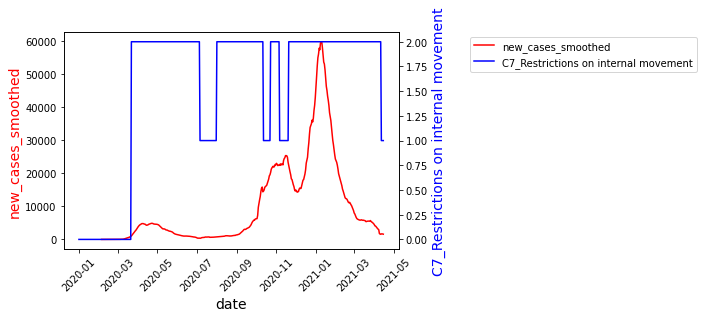

In [24]:
# cases overlaid with C7_Restrictions on internal movement

index_considered = 'C7_Restrictions on internal movement'
fig,ax = plt.subplots()
plt.xticks(rotation=degrees)
l1 = ax.plot(uk_owid['date'], uk_owid[cases_str], color="red",label=cases_str)
# l2 = ax.plot(['date'].iloc[cases_ilocs_max], cases_deaths_df[cases_str].iloc[cases_ilocs_max], lw=0, color='black', marker="v", label='cases local maxima')
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel(cases_str,color="red",fontsize=14)
ax.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
l3 = ax2.plot(uk_owid['date'], uk_owid[index_considered], color="blue", label=index_considered)
# l4 = ax2.plot(cases_deaths_df['date'].iloc[deaths_ilocs_max], cases_deaths_df[deaths_str].iloc[deaths_ilocs_max], lw=0, color='black', marker="o", label='deaths local maxima')
ax2.set_ylabel(index_considered,color="blue",fontsize=14)
# ax2.legend(loc=1)

lns = l1+l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(1.2,1), loc="upper left")

plt.show()

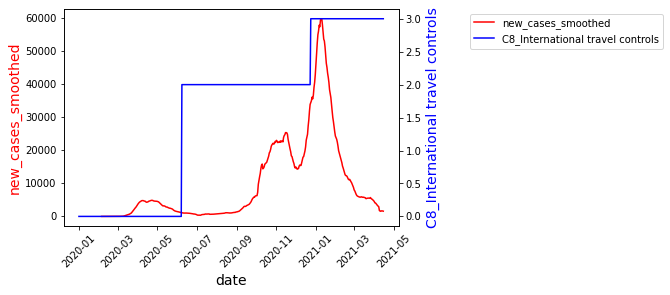

In [25]:
# cases overlaid with C8_International travel controls

index_considered = 'C8_International travel controls'
fig,ax = plt.subplots()
plt.xticks(rotation=degrees)
l1 = ax.plot(uk_owid['date'], uk_owid[cases_str], color="red",label=cases_str)
# l2 = ax.plot(['date'].iloc[cases_ilocs_max], cases_deaths_df[cases_str].iloc[cases_ilocs_max], lw=0, color='black', marker="v", label='cases local maxima')
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel(cases_str,color="red",fontsize=14)
ax.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
l3 = ax2.plot(uk_owid['date'], uk_owid[index_considered], color="blue", label=index_considered)
# l4 = ax2.plot(cases_deaths_df['date'].iloc[deaths_ilocs_max], cases_deaths_df[deaths_str].iloc[deaths_ilocs_max], lw=0, color='black', marker="o", label='deaths local maxima')
ax2.set_ylabel(index_considered,color="blue",fontsize=14)
# ax2.legend(loc=1)

lns = l1+l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(1.2,1), loc="upper left")

plt.show()

In [26]:
world_owid.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.026                  0.026   
1                    0.026                  0.000   
2                    0.026                  0.000   
3                    0.026                  0.000   
4                    0.026                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   
1                     NaN                              NaN                NaN   
2                     NaN                              NaN                NaN   
3                     NaN                              NaN                NaN   
4                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  new_tests  total_tests  \
0                                 NaN        NaN          NaN   
1                                 NaN        NaN          NaN   
2                                 NaN        NaN          NaN   
3                                 NaN        NaN          NaN   
4                                 NaN        NaN          NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_

In [27]:
world_owid['date'] = pd.to_datetime(world_owid['date'], format='%Y-%m-%d')
world_owid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81905 entries, 0 to 81904
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               81905 non-null  object        
 1   continent                              77929 non-null  object        
 2   location                               81905 non-null  object        
 3   date                                   81905 non-null  datetime64[ns]
 4   total_cases                            80087 non-null  float64       
 5   new_cases                              80085 non-null  float64       
 6   new_cases_smoothed                     79084 non-null  float64       
 7   total_deaths                           70548 non-null  float64       
 8   new_deaths                             70706 non-null  float64       
 9   new_deaths_smoothed                    79084 non-null  float6

In [28]:
date_considered = '2021-03-31'
countries_data_on_date = world_owid[(world_owid['date'] == date_considered) & (~world_owid['iso_code'].str.startswith('OWID'))]
countries_data_on_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 401 to 81889
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               202 non-null    object        
 1   continent                              202 non-null    object        
 2   location                               202 non-null    object        
 3   date                                   202 non-null    datetime64[ns]
 4   total_cases                            189 non-null    float64       
 5   new_cases                              189 non-null    float64       
 6   new_cases_smoothed                     189 non-null    float64       
 7   total_deaths                           179 non-null    float64       
 8   new_deaths                             179 non-null    float64       
 9   new_deaths_smoothed                    189 non-null    float6

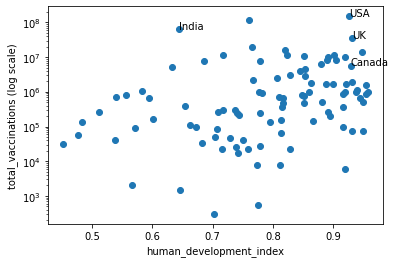

In [29]:
x_value = 'human_development_index'
y_value = 'total_vaccinations'
annotations = {'GBR':'UK', 'IND':'India', 'USA':'USA', 'CAN':'Canada'}
use_log = True

plt.scatter(x=countries_data_on_date[x_value], y=countries_data_on_date[y_value])
if use_log:
    plt.gca().set_yscale('log')

for code in annotations:
    plt.annotate(annotations[code], (countries_data_on_date[countries_data_on_date['iso_code'] == code][x_value],\
                                    countries_data_on_date[countries_data_on_date['iso_code'] == code][y_value]))

plt.xlabel(x_value)

if use_log:
    plt.ylabel(y_value+' (log scale)')
else:
    plt.ylabel(y_value)

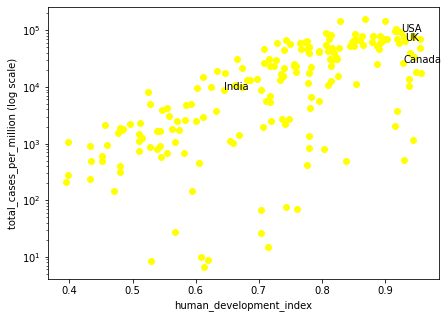

In [30]:
x_value = 'human_development_index'
y_value = 'total_cases_per_million'
annotations = {'GBR':'UK', 'IND':'India', 'USA':'USA', 'CAN':'Canada'}
use_log = True

plt.scatter(x=countries_data_on_date[x_value], y=countries_data_on_date[y_value], color='yellow')
plt.gcf().set_size_inches(7, 5)
if use_log:
    plt.gca().set_yscale('log')

for code in annotations:
    plt.annotate(annotations[code], (countries_data_on_date[countries_data_on_date['iso_code'] == code][x_value],\
                                    countries_data_on_date[countries_data_on_date['iso_code'] == code][y_value]))

plt.xlabel(x_value)

if use_log:
    plt.ylabel(y_value+' (log scale)')
else:
    plt.ylabel(y_value)

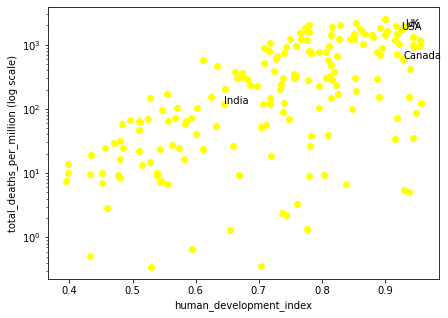

In [31]:
x_value = 'human_development_index'
y_value = 'total_deaths_per_million'
annotations = {'GBR':'UK', 'IND':'India', 'USA':'USA', 'CAN':'Canada'}
use_log = True

plt.scatter(x=countries_data_on_date[x_value], y=countries_data_on_date[y_value], color='yellow')
plt.gcf().set_size_inches(7, 5)
if use_log:
    plt.gca().set_yscale('log')

for code in annotations:
    plt.annotate(annotations[code], (countries_data_on_date[countries_data_on_date['iso_code'] == code][x_value],\
                                    countries_data_on_date[countries_data_on_date['iso_code'] == code][y_value]))

plt.xlabel(x_value)

if use_log:
    plt.ylabel(y_value+' (log scale)')
else:
    plt.ylabel(y_value)

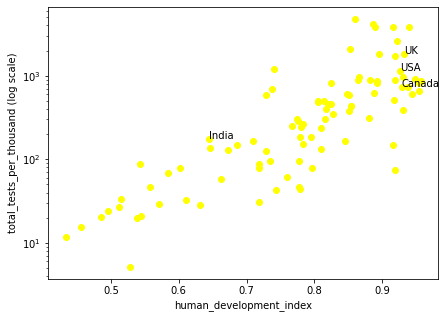

In [32]:
x_value = 'human_development_index'
y_value = 'total_tests_per_thousand'
annotations = {'GBR':'UK', 'IND':'India', 'USA':'USA', 'CAN':'Canada'}
use_log = True

plt.scatter(x=countries_data_on_date[x_value], y=countries_data_on_date[y_value], color='yellow')
plt.gcf().set_size_inches(7, 5)
if use_log:
    plt.gca().set_yscale('log')

for code in annotations:
    plt.annotate(annotations[code], (countries_data_on_date[countries_data_on_date['iso_code'] == code][x_value],\
                                    countries_data_on_date[countries_data_on_date['iso_code'] == code][y_value]))

plt.xlabel(x_value)

if use_log:
    plt.ylabel(y_value+' (log scale)')
else:
    plt.ylabel(y_value)

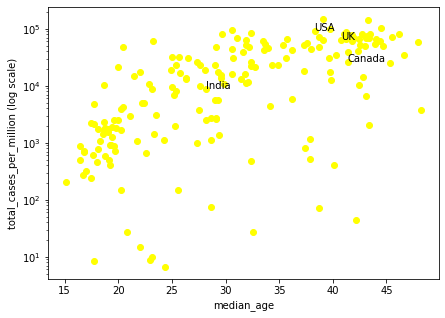

In [33]:
x_value = 'median_age'
y_value = 'total_cases_per_million'
annotations = {'GBR':'UK', 'IND':'India', 'USA':'USA', 'CAN':'Canada'}
use_log = True

plt.scatter(x=countries_data_on_date[x_value], y=countries_data_on_date[y_value], color='yellow')
plt.gcf().set_size_inches(7, 5)
if use_log:
    plt.gca().set_yscale('log')

for code in annotations:
    plt.annotate(annotations[code], (countries_data_on_date[countries_data_on_date['iso_code'] == code][x_value],\
                                    countries_data_on_date[countries_data_on_date['iso_code'] == code][y_value]))

plt.xlabel(x_value)

if use_log:
    plt.ylabel(y_value+' (log scale)')
else:
    plt.ylabel(y_value)

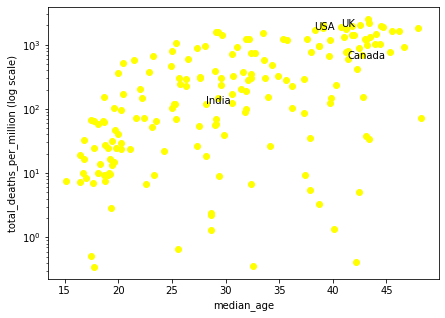

In [34]:
x_value = 'median_age'
y_value = 'total_deaths_per_million'
annotations = {'GBR':'UK', 'IND':'India', 'USA':'USA', 'CAN':'Canada'}
use_log = True

plt.scatter(x=countries_data_on_date[x_value], y=countries_data_on_date[y_value], color='yellow')
plt.gcf().set_size_inches(7, 5)
if use_log:
    plt.gca().set_yscale('log')

for code in annotations:
    plt.annotate(annotations[code], (countries_data_on_date[countries_data_on_date['iso_code'] == code][x_value],\
                                    countries_data_on_date[countries_data_on_date['iso_code'] == code][y_value]))

plt.xlabel(x_value)

if use_log:
    plt.ylabel(y_value+' (log scale)')
else:
    plt.ylabel(y_value)

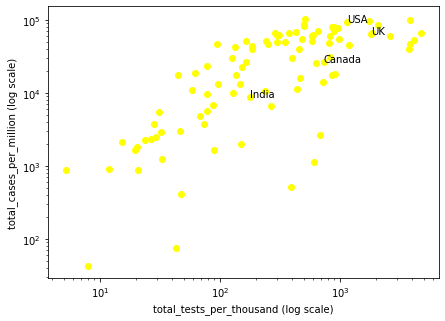

In [35]:
x_value = 'total_tests_per_thousand'
y_value = 'total_cases_per_million'
annotations = {'GBR':'UK', 'IND':'India', 'USA':'USA', 'CAN':'Canada'}
use_log = True

plt.scatter(x=countries_data_on_date[x_value], y=countries_data_on_date[y_value], color='yellow')
plt.gcf().set_size_inches(7, 5)
if use_log:
    plt.gca().set_yscale('log')
    plt.gca().set_xscale('log')
    

for code in annotations:
    plt.annotate(annotations[code], (countries_data_on_date[countries_data_on_date['iso_code'] == code][x_value],\
                                    countries_data_on_date[countries_data_on_date['iso_code'] == code][y_value]))

plt.xlabel(x_value+' (log scale)')

if use_log:
    plt.ylabel(y_value+' (log scale)')
else:
    plt.ylabel(y_value)

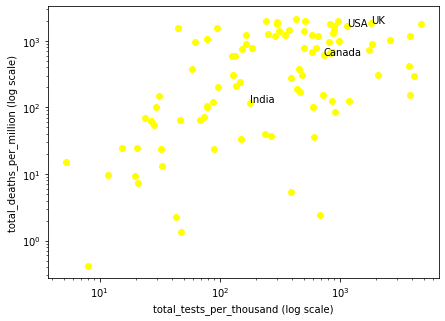

In [36]:
x_value = 'total_tests_per_thousand'
y_value = 'total_deaths_per_million'
annotations = {'GBR':'UK', 'IND':'India', 'USA':'USA', 'CAN':'Canada'}
use_log = True

plt.scatter(x=countries_data_on_date[x_value], y=countries_data_on_date[y_value], color='yellow')
plt.gcf().set_size_inches(7, 5)
if use_log:
    plt.gca().set_yscale('log')
    plt.gca().set_xscale('log')
    

for code in annotations:
    plt.annotate(annotations[code], (countries_data_on_date[countries_data_on_date['iso_code'] == code][x_value],\
                                    countries_data_on_date[countries_data_on_date['iso_code'] == code][y_value]))

plt.xlabel(x_value+' (log scale)')

if use_log:
    plt.ylabel(y_value+' (log scale)')
else:
    plt.ylabel(y_value)

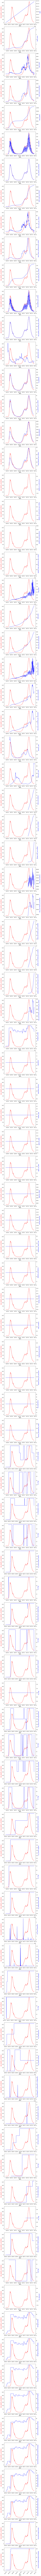

In [37]:
# Plotting all variables vs new_deaths_smoothed for feature selection

main_variable = 'new_deaths_smoothed'

rows = len(uk_owid.columns)
cols = 1
fig,ax = plt.subplots(rows)
fig.set_size_inches(7, 5*rows)
plt.xticks(rotation=degrees)
plt.tight_layout(pad=2, w_pad=2, h_pad=2) 
for i in range(rows):
    ax1 = ax[i]
    # twin object for two different y-axis on the sample plot
    ax2 = ax[i].twinx()
    aux_variable = uk_owid.columns[i]

    l1 = ax1.plot(uk_owid['date'], uk_owid[main_variable], color="red",label=main_variable)
    ax1.set_xlabel("date",fontsize=14)
    ax1.set_ylabel(main_variable, color="red",fontsize=14)

    # make a plot with different y-axis using second axis object
    l3 = ax2.plot(uk_owid['date'], uk_owid[aux_variable], color="blue", label=aux_variable)
    # l4 = ax2.plot(cases_deaths_df['date'].iloc[deaths_ilocs_max], cases_deaths_df[deaths_str].iloc[deaths_ilocs_max], lw=0, color='black', marker="o", label='deaths local maxima')
    ax2.set_ylabel(aux_variable,color="blue",fontsize=14)

    lns = l1+l3
    labs = [l.get_label() for l in lns]
#         ax1.legend(lns, labs, bbox_to_anchor=(1.2,1), loc="upper left")

plt.show()

In [38]:
uk_owid.corr()

total_cases  new_cases  new_cases_smoothed  \
total_cases                           1.000000   0.415954            0.454665   
new_cases                             0.415954   1.000000            0.979533   
new_cases_smoothed                    0.454665   0.979533            1.000000   
total_deaths                          0.965686   0.283264            0.323367   
new_deaths                            0.284448   0.576393            0.617003   
...                                        ...        ...                 ...   
GovernmentResponseIndexForDisplay     0.558882   0.412488            0.428945   
ContainmentHealthIndex                0.611569   0.442100            0.462966   
ContainmentHealthIndexForDisplay      0.611569   0.442100            0.462966   
EconomicSupportIndex                  0.303869   0.261443            0.254493   
EconomicSupportIndexForDisplay        0.303869   0.261443            0.254493   

                                   total_deaths  new_deaths  \
total_cases                            0.965686    0.284448   
new_cases                              0.283264    0.576393   
new_cases_smoothed                     0.323367    0.617003   
total_deaths                           1.000000    0.153065   
new_deaths                             0.153065    1.000000   
...                                         ...         ...   
GovernmentResponseIndexForDisplay      0.675827    0.347726   
ContainmentHealthIndex                 0.723179    0.371946   
ContainmentHealthIndexForDisplay       0.723179    0.371946   
EconomicSupportIndex                   0.306336    0.158508   
EconomicSupportIndexForDisplay         0.306336    0.158508   

                                   new_deaths_smoothed  \
total_cases                                   0.383852   
new_cases                                     0.586691   
new_cases_smoothed                            0.648811   
total_deaths                                  0.218375   
new_deaths                                    0.898333   
...                                                ...   
GovernmentResponseIndexForDisplay             0.433011   
ContainmentHealthIndex                        0.458120   
ContainmentHealthIndexForDisplay              0.458120   
EconomicSupportIndex                          0.294552   
EconomicSupportIndexForDisplay                0.294552   

                                   total_cases_per_million  \
total_cases                                       1.000000   
new_cases                                         0.415954   
new_cases_smoothed                                0.454665   
total_deaths                                      0.965686   
new_deaths                                        0.284448   
...                                                    ...   
GovernmentResponseIndexForDisplay                 0.558882   
ContainmentHealthIndex                            0.611569   
ContainmentHealthIndexForDisplay                  0.611569   
EconomicSupportIndex                              0.303869   
EconomicSupportIndexForDisplay                    0.303869   

                                   new_cases_per_million  \
total_cases                                     0.415954   
new_cases                                       1.000000   
new_cases_smoothed                              0.979533   
total_deaths                                    0.283264   
new_deaths                                      0.576393   
...                                                  ...   
GovernmentResponseIndexForDisplay               0.412488   
ContainmentHealthIndex                          0.442100   
ContainmentHealthIndexForDisplay                0.442100   
EconomicSupportIndex                            0.261443   
EconomicSupportIndexForDisplay                  0.261443   

                                   new_cases_smoothed_per_million  \
total_cases                                              0.454665   
new_